In [33]:
#load library
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [5]:
#load dataset
adm = pd.read_csv('admissions.csv')
adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [6]:
#Read in your dataset, determine how many samples are present, and ID any missing data
adm.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [13]:
#Create a table of descriptive statistics for each of the variables (n, mean, median, standard deviation)
adm.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


<IPython.core.display.Javascript object>


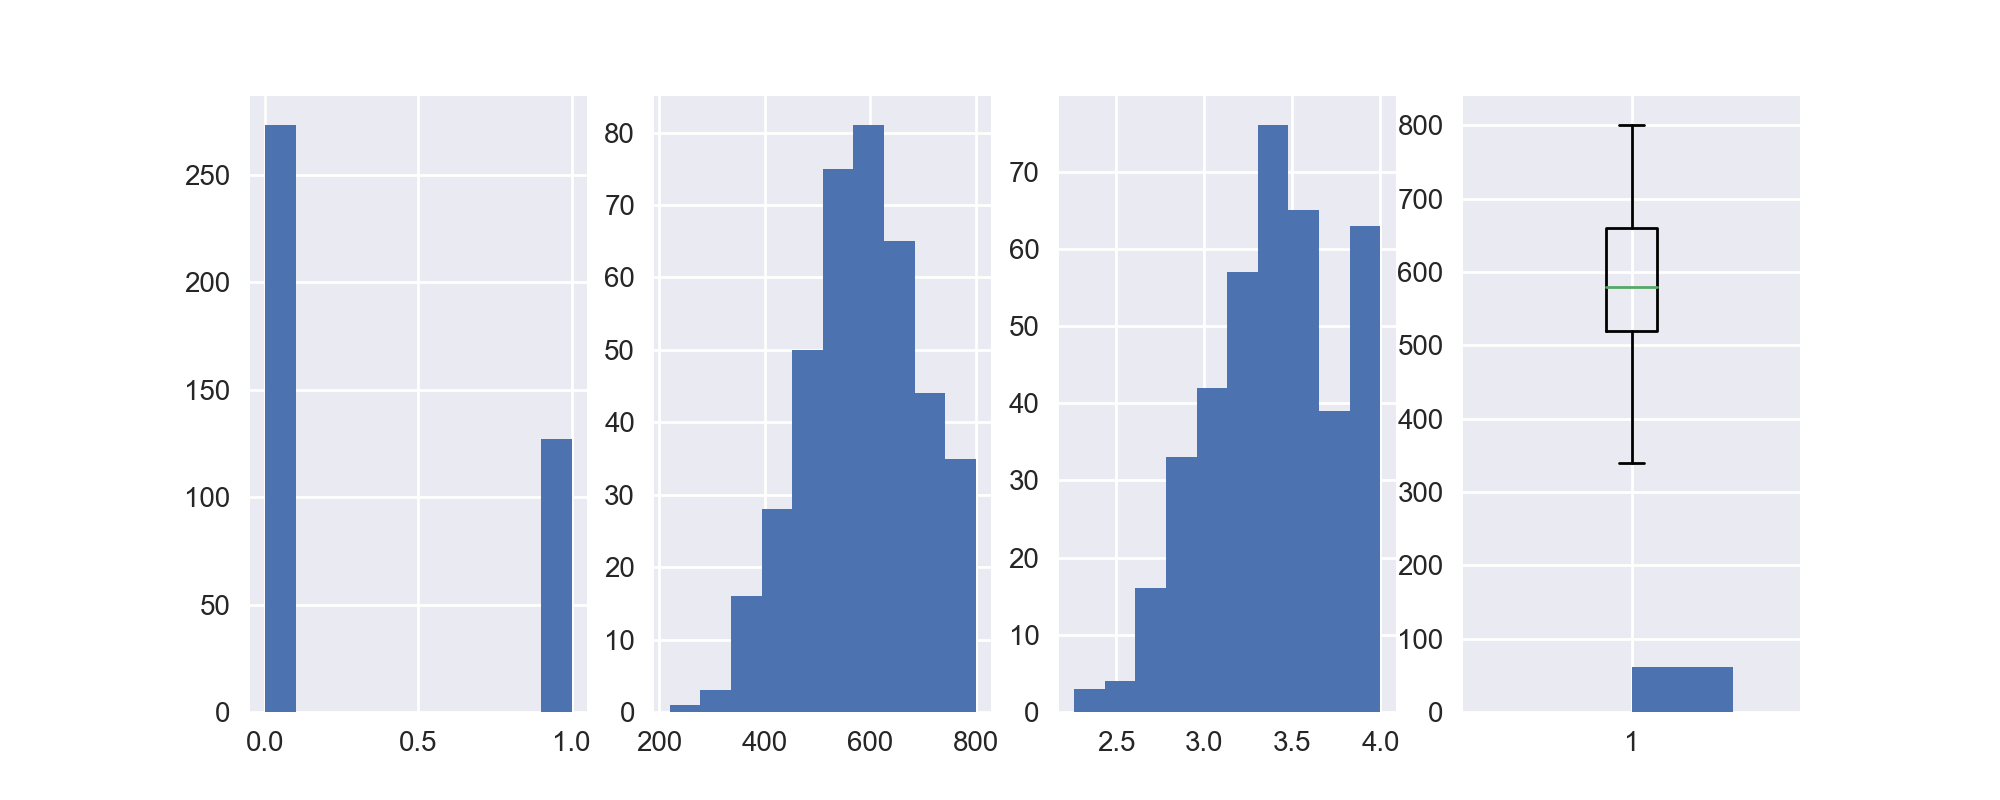

(array([  61.,    0.,    0.,  150.,    0.,    0.,  121.,    0.,    0.,   67.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

In [37]:
#Describe the distributions of your data, remove NaN values
plt.figure(figsize = (10, 4))
plt.subplot(141)
plt.hist(adm['admit'])

plt.subplot(142)
plt.hist(adm['gre'].dropna())

plt.subplot(143)
plt.hist(adm['gpa'].dropna())

plt.subplot(144)
plt.hist(adm['prestige'].dropna())

<IPython.core.display.Javascript object>


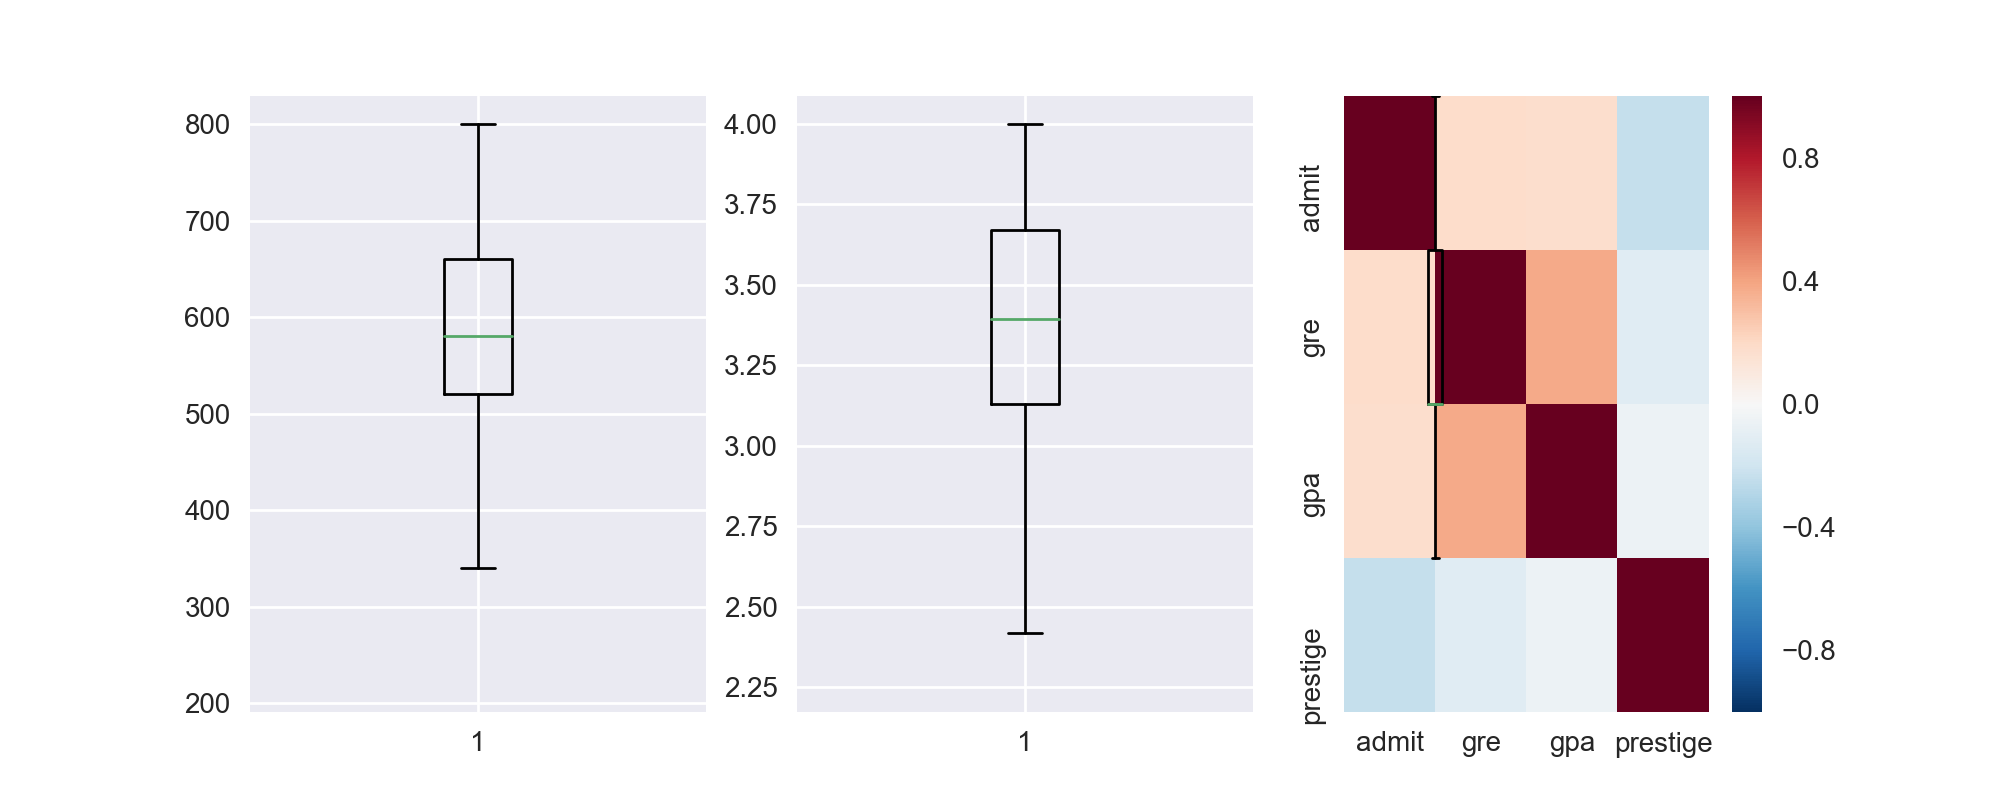

{'boxes': [<matplotlib.lines.Line2D at 0x127a2cc88>],
 'caps': [<matplotlib.lines.Line2D at 0x127a35fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1279dba90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1279ebcc0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x127a2cb00>,
  <matplotlib.lines.Line2D at 0x127a35dd8>]}

In [41]:
#Plot box plots for each variable
plt.figure(figsize = (10, 4))
plt.subplot(131)
plt.boxplot(adm['gre'].dropna())

plt.subplot(132)
plt.boxplot(adm['gpa'].dropna())

plt.subplot(133)
plt.boxplot(adm['prestige'].dropna())

In [43]:
#Create a covariance matrix
adm.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


<IPython.core.display.Javascript object>


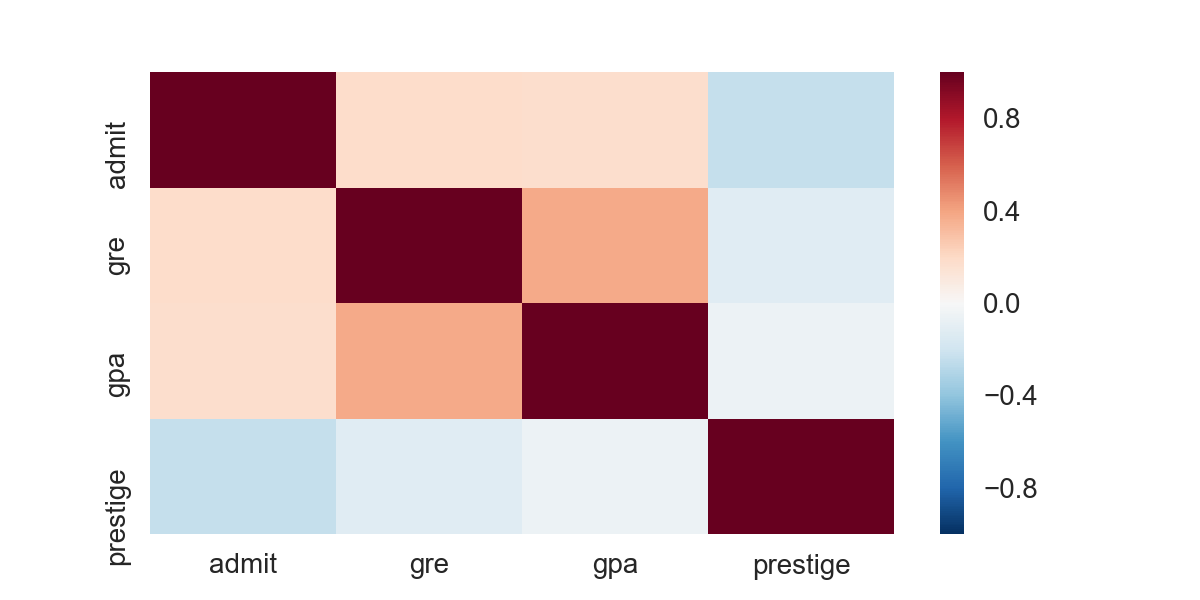

In [49]:
plt.figure(figsize = (6, 3))
sns.heatmap(adm.corr())

<IPython.core.display.Javascript object>


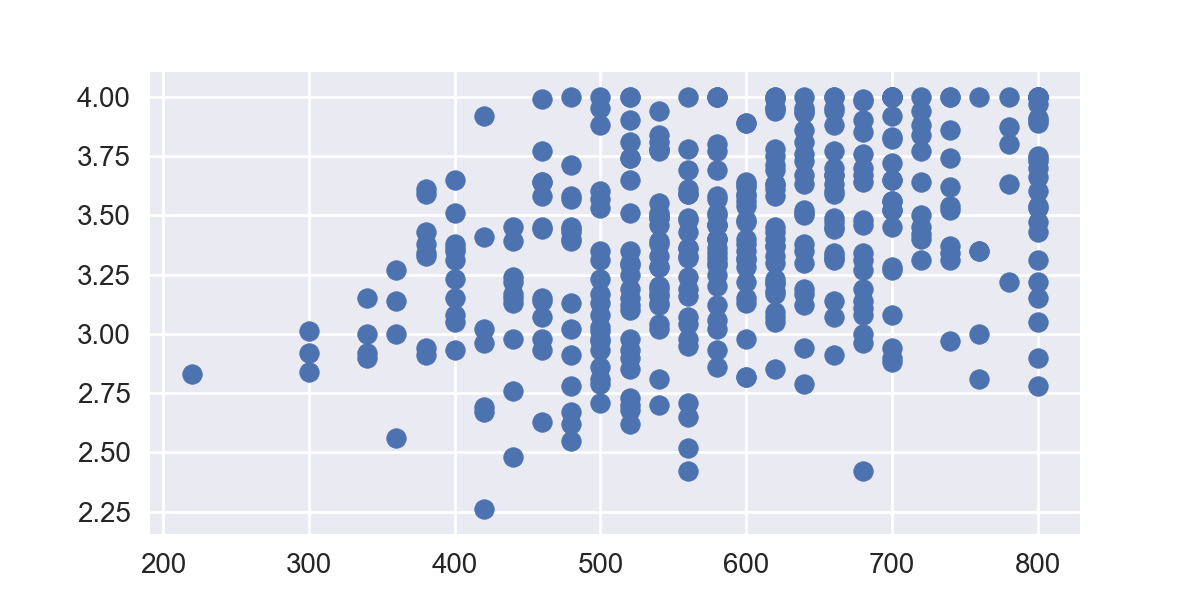

In [53]:
#Determine any issues or limitations, based on your exploratory analysis
#Ans: I should plot scatter graph to see any outliners.
plt.figure(figsize = (6, 3))
plt.scatter(adm['gre'],adm['gpa'])

In [56]:
#Bonus: Replace missing values using the median replacement method
gre_all = adm['gre'].replace(adm['gre'].dropna().median,np.NaN)
gpa_all = adm['gpa'].replace(adm['gpa'].dropna().median,np.NaN)

In [58]:
#Log transform data to meet normality requirements
np.log(gre_all)

0      5.940171
1      6.492240
2      6.684612
3      6.461468
4      6.253829
5      6.633318
6      6.327937
7      5.991465
8      6.291569
9      6.551080
10     6.684612
11     6.086775
12     6.633318
13     6.551080
14     6.551080
15     6.173786
16     6.659294
17     5.886104
18     6.684612
19     6.291569
20     6.214608
21     6.492240
22     6.396930
23     6.522093
24     6.633318
25     6.684612
26     6.429719
27     6.253829
28     6.659294
29     6.253829
         ...   
370    6.291569
371    6.522093
372    6.522093
373    6.429719
374    6.327937
375    6.327937
376    6.429719
377    6.684612
378    6.461468
379    6.291569
380    6.551080
381    6.291569
382    6.291569
383    6.492240
384    6.173786
385    6.040255
386    6.606650
387    6.363028
388    6.461468
389    6.461468
390    6.684612
391    6.492240
392    6.396930
393    6.429719
394    6.131226
395    6.429719
396    6.327937
397    6.131226
398    6.551080
399    6.396930
Name: gre, Length: 400, 